In [4]:
from pyomo.environ import ConcreteModel, SolverFactory, Constraint, value
from idaes.core import FlowsheetBlock

# Import idaes logger to set output levels
import idaes.logger as idaeslog




In [5]:
m = ConcreteModel()
m.fs = FlowsheetBlock(dynamic=False)

In [6]:
m.pprint()

1 Block Declarations
    fs : Size=1, Index=None, Active=True
        1 Set Declarations
            _time : Size=1, Index=None, Ordered=Insertion
                Key  : Dimen : Domain : Size : Members
                None :     1 :    Any :    1 :  {0.0,}

        1 Declarations: _time

1 Declarations: fs


In [7]:
from idaes.models.properties.activity_coeff_models.BTX_activity_coeff_VLE \
    import BTXParameterBlock

In [8]:
m.fs.properties = BTXParameterBlock(valid_phase=('Liq', 'Vap'),
                                    activity_coeff_model="Ideal",
                                    state_vars="FTPz")

In [9]:
from idaes.models.unit_models import Flash

In [10]:


m.fs.flash = Flash(property_package=m.fs.properties)



In [11]:
# Todo: import the degrees_of_freedom function from the idaes.core.util.model_statistics package
from idaes.core.util.model_statistics import degrees_of_freedom

# Todo: Call the python help on the degrees_of_freedom function
help(degrees_of_freedom)

Help on function degrees_of_freedom in module idaes.core.util.model_statistics:

degrees_of_freedom(block)
    Method to return the degrees of freedom of a model.
    
    Args:
        block : model to be studied
    
    Returns:
        Number of degrees of freedom in block.



In [12]:
# Todo: print the degrees of freedom for your model
print("Degrees of Freedom =", degrees_of_freedom(m))

Degrees of Freedom = 7


In [13]:
m.fs.flash.inlet.flow_mol.fix(1.0)

In [14]:
m.fs.flash.inlet.mole_frac_comp[0, "benzene"].fix(0.5)

In [15]:
m.fs.flash.heat_duty.fix(0)

In [16]:
# Todo: Add inlet specifications given above
m.fs.flash.inlet.flow_mol.fix(1)
m.fs.flash.inlet.temperature.fix(368)
m.fs.flash.inlet.pressure.fix(101325)
m.fs.flash.inlet.mole_frac_comp[0, "benzene"].fix(0.5)
m.fs.flash.inlet.mole_frac_comp[0, "toluene"].fix(0.5)

# Todo: Add 2 flash unit specifications given above
m.fs.flash.heat_duty.fix(0)
m.fs.flash.deltaP.fix(0)

In [17]:


# Todo: print the degrees of freedom for your model
print("Degrees of Freedom =", degrees_of_freedom(m))



Degrees of Freedom = 0


In [18]:
# Todo: initialize the flash unit
m.fs.flash.initialize(outlvl=idaeslog.INFO)

2025-03-26 09:53:49 [INFO] idaes.init.fs.flash.control_volume.properties_in: Initialization Step 1 optimal - Optimal Solution Found.
2025-03-26 09:53:49 [INFO] idaes.init.fs.flash.control_volume.properties_in: Initialization Step 2 optimal - Optimal Solution Found.
2025-03-26 09:53:50 [INFO] idaes.init.fs.flash.control_volume.properties_in: Initialization Step 3 optimal - Optimal Solution Found.
2025-03-26 09:53:50 [INFO] idaes.init.fs.flash.control_volume.properties_in: Initialization Step 4 optimal - Optimal Solution Found.
2025-03-26 09:53:50 [INFO] idaes.init.fs.flash.control_volume.properties_in: Initialization Step 5 optimal - Optimal Solution Found.
2025-03-26 09:53:50 [INFO] idaes.init.fs.flash.control_volume.properties_out: Initialization Step 1 optimal - Optimal Solution Found.
2025-03-26 09:53:50 [INFO] idaes.init.fs.flash.control_volume.properties_out: Initialization Step 2 optimal - Optimal Solution Found.
2025-03-26 09:53:50 [INFO] idaes.init.fs.flash.control_volume.prope

In [19]:


# Todo: create the ipopt solver
solver = SolverFactory('ipopt')

# Todo: solve the model
status = solver.solve(m, tee=True)



Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        computation. See http://

In [20]:
print('Vap. Outlet Temperature = ', value(m.fs.flash.vap_outlet.temperature[0]))
m.fs.flash.vap_outlet.temperature.display()
m.fs.flash.vap_outlet.display()

Vap. Outlet Temperature =  368.0
_Vap_temperature_ref : Size=1, Index=fs._time, ReferenceTo=fs.flash.control_volume.properties_out[:].component('temperature')
    Key : Lower : Value : Upper : Fixed : Stale : Domain
    0.0 :     0 : 368.0 :  None : False : False : NonNegativeReals
vap_outlet : Size=1
    Key  : Name           : Value
    None :       flow_mol : {0.0: 0.3961181748774178}
         : mole_frac_comp : {(0.0, 'benzene'): 0.6339766485081293, (0.0, 'toluene'): 0.3660233514918707}
         :       pressure : {0.0: 101325.0}
         :    temperature : {0.0: 368.0}


In [21]:


# Print the pressure of the flash vapor outlet
print('Pressure =', value(m.fs.flash.vap_outlet.pressure[0]))

print()
print('Output from display:')
# Call display on vap_outlet and liq_outlet of the flash
m.fs.flash.vap_outlet.display()
m.fs.flash.liq_outlet.display()



Pressure = 101325.0

Output from display:
vap_outlet : Size=1
    Key  : Name           : Value
    None :       flow_mol : {0.0: 0.3961181748774178}
         : mole_frac_comp : {(0.0, 'benzene'): 0.6339766485081293, (0.0, 'toluene'): 0.3660233514918707}
         :       pressure : {0.0: 101325.0}
         :    temperature : {0.0: 368.0}
liq_outlet : Size=1
    Key  : Name           : Value
    None :       flow_mol : {0.0: 0.6038818251225821}
         : mole_frac_comp : {(0.0, 'benzene'): 0.41211759772293083, (0.0, 'toluene'): 0.5878824022770692}
         :       pressure : {0.0: 101325.0}
         :    temperature : {0.0: 368.0}


In [22]:
m.fs.flash.report()


Unit : fs.flash                                                            Time: 0.0
------------------------------------------------------------------------------------
    Unit Performance

    Variables: 

    Key             : Value  : Units  : Fixed : Bounds
          Heat Duty : 0.0000 :   watt :  True : (None, None)
    Pressure Change : 0.0000 : pascal :  True : (None, None)

------------------------------------------------------------------------------------
    Stream Table
                               Units         Inlet    Vapor Outlet  Liquid Outlet
    flow_mol                mole / second     1.0000      0.39612       0.60388  
    mole_frac_comp benzene  dimensionless    0.50000      0.63398       0.41212  
    mole_frac_comp toluene  dimensionless    0.50000      0.36602       0.58788  
    temperature                    kelvin     368.00       368.00        368.00  
    pressure                       pascal 1.0132e+05   1.0132e+05    1.0132e+05  


In [23]:


import matplotlib.pyplot as plt



Simulating with Q = -17000.0
... solve successful.
Simulating with Q = -16142.857142857143
... solve successful.
Simulating with Q = -15285.714285714286
... solve successful.
Simulating with Q = -14428.571428571428
... solve successful.
Simulating with Q = -13571.428571428572
... solve successful.
Simulating with Q = -12714.285714285714
... solve successful.
Simulating with Q = -11857.142857142857
... solve successful.
Simulating with Q = -11000.0
... solve successful.
Simulating with Q = -10142.857142857143
... solve successful.
Simulating with Q = -9285.714285714286
... solve successful.
Simulating with Q = -8428.57142857143
... solve successful.
Simulating with Q = -7571.4285714285725
... solve successful.
Simulating with Q = -6714.285714285714
... solve successful.
Simulating with Q = -5857.142857142857
... solve successful.
Simulating with Q = -5000.0
... solve successful.
Simulating with Q = -4142.857142857143
... solve successful.
Simulating with Q = -3285.7142857142862
... solv

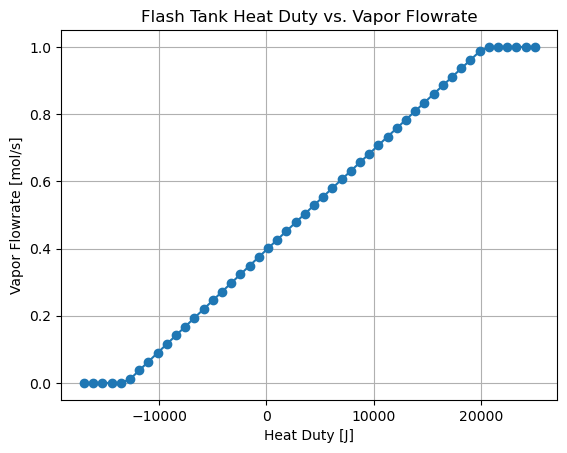

In [24]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from pyomo.environ import value  # Ensure you can extract values from Pyomo models

# Create empty lists to store results
Q = []
V = []

# Re-initialize the model
m.fs.flash.initialize(outlvl=idaeslog.WARNING)

# Loop through heat duty values using numpy's linspace
for duty in np.linspace(-17000, 25000, 50):
    # Fix the heat duty
    m.fs.flash.heat_duty.fix(duty)
    
    # Store the duty value in Q
    Q.append(duty)
    
    # Print current simulation step
    print(f"Simulating with Q = {duty}")

    # Solve the model
    status = solver.solve(m)
    
    # Check solver status (this may need adjustment depending on your solver)
    if status.solver.status == 'ok':
        V.append(value(m.fs.flash.vap_outlet.flow_mol[0]))
        print('... solve successful.')
    else:
        V.append(np.nan)  # Use NaN to avoid misleading zero values in the plot
        print('... solve failed.')
    
# Create and show the figure
plt.figure("Vapor Flowrate vs. Heat Duty")
plt.plot(Q, V, marker='o', linestyle='-')
plt.grid()
plt.xlabel("Heat Duty [J]")
plt.ylabel("Vapor Flowrate [mol/s]")
plt.title("Flash Tank Heat Duty vs. Vapor Flowrate")
plt.show()


In [25]:


# re-initialize the model - this may or may not be required depending on current state but safe to initialize
m.fs.flash.heat_duty.fix(0)
m.fs.flash.initialize(outlvl=idaeslog.WARNING)

# Unfix the heat_duty variable
m.fs.flash.heat_duty.unfix()

# Todo: Add a new constraint (benzene mole fraction to 0.6)
m.benz_purity_con = Constraint(expr= m.fs.flash.vap_outlet.mole_frac_comp[0, "benzene"] == 0.6)

# solve the problem
status = solver.solve(m, tee=True)

# Check stream condition
m.fs.flash.report()



Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        computation. See http://

In [26]:
from idaes_ui.fv import visualize  

In [ ]:
visualize(m.fs, "My Process Flowsheet")

2025-03-26 09:54:03 [INFO] idaes.idaes_ui.fv.fsvis: Started visualization server
2025-03-26 09:54:03 [INFO] idaes.idaes_ui.fv.fsvis: Loading saved flowsheet from 'My Process Flowsheet.json'
2025-03-26 09:54:03 [INFO] idaes.idaes_ui.fv.fsvis: Saving flowsheet to default file 'My Process Flowsheet.json' in current directory (c:\Users\Sara\Desktop\IDAES)
2025-03-26 09:54:03 [WARNING] idaes.idaes_ui.fv.flowsheet: Cannot extract state block from Port: name=liq_outlet. Please add Feed & Product blocks with Arcs to show inlet and outlet stream values in the Stream Table
2025-03-26 09:54:03 [WARNING] idaes.idaes_ui.fv.flowsheet: Cannot extract state block from Port: name=vap_outlet. Please add Feed & Product blocks with Arcs to show inlet and outlet stream values in the Stream Table
2025-03-26 09:54:03 [WARNING] idaes.idaes_ui.fv.fsvis: Flowsheet name changed: old='My Process Flowsheet' new='My-Process-Flowsheet'
Flowsheet name changed to 'My-Process-Flowsheet'
2025-03-26 09:54:04 [INFO] idaes

VisualizeResult(store=<idaes_ui.fv.persist.FileDataStore object at 0x0000024C7229E710>, port=64718, server=<idaes_ui.fv.model_server.FlowsheetServer object at 0x0000024C7229CA60>)

2025-03-26 09:54:04 [WARNING] idaes.idaes_ui.fv.flowsheet: Cannot extract state block from Port: name=liq_outlet. Please add Feed & Product blocks with Arcs to show inlet and outlet stream values in the Stream Table
2025-03-26 09:54:04 [WARNING] idaes.idaes_ui.fv.flowsheet: Cannot extract state block from Port: name=vap_outlet. Please add Feed & Product blocks with Arcs to show inlet and outlet stream values in the Stream Table
2025-03-26 10:03:33 [WARNING] idaes.core.util.scaling: Nonsquare Jacobian using pseudo inverse
2025-03-26 10:03:33 [WARNING] idaes.idaes_ui.fv.flowsheet: Cannot extract state block from Port: name=liq_outlet. Please add Feed & Product blocks with Arcs to show inlet and outlet stream values in the Stream Table
2025-03-26 10:03:33 [WARNING] idaes.idaes_ui.fv.flowsheet: Cannot extract state block from Port: name=vap_outlet. Please add Feed & Product blocks with Arcs to show inlet and outlet stream values in the Stream Table
2025-03-26 10:03:52 [WARNING] idaes.idaes